In [1]:
%run ../dstools/ml/multiclass_reports.py

# Per class model report

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

split = train_test_split(iris.data, iris.target, test_size=0.9)
x_train, x_test, y_train, y_test = split
y_score = LogisticRegression().fit(x_train, y_train).predict_proba(x_test)

integral_report(y_test, y_score, iris.target_names)

,ROC-AUC,PR-AUC,PR-AUC-Lift,support
class,,,,
setosa,1.000000,1.000000,2.812500,48
versicolor,0.984432,0.969283,3.191543,41
virginica,0.992428,0.984036,2.887933,46
all,0.992287,0.984440,2.953320,135


# Prescision-recall curve

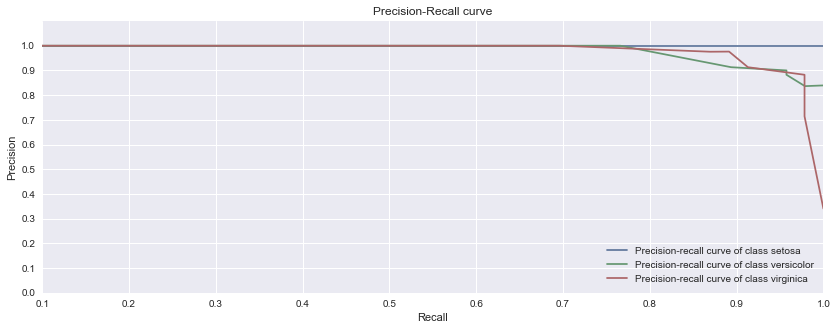

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import seaborn as sns
sns.set_palette("deep", desat=.6)

from sklearn.datasets import load_iris
iris = load_iris()

split = train_test_split(iris.data, iris.target, test_size=0.9)
x_train, x_test, y_train, y_test = split

y_score = RandomForestClassifier().fit(x_train, y_train).predict_proba(x_test)
draw_precision_recall_curve(y_score, y_test, iris.target_names, figsize=(14,5))

# Precision vs recall curve for multiple classes

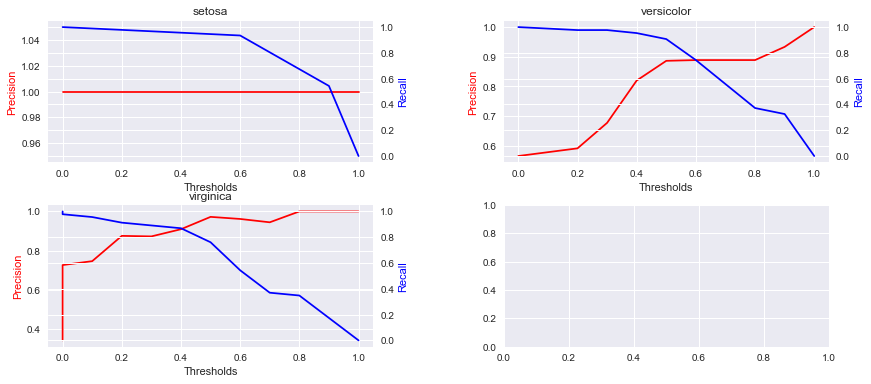

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import seaborn as sns
sns.set_palette("deep", desat=.6)

from sklearn.datasets import load_iris
iris = load_iris()

split = train_test_split(iris.data, iris.target, test_size=0.9)
x_train, x_test, y_train, y_test = split

y_score = RandomForestClassifier().fit(x_train, y_train).predict_proba(x_test)
draw_precision_vs_recall(y_score, y_test, iris.target_names, figsize=(14,6))

# ROC curve for multiclass classification

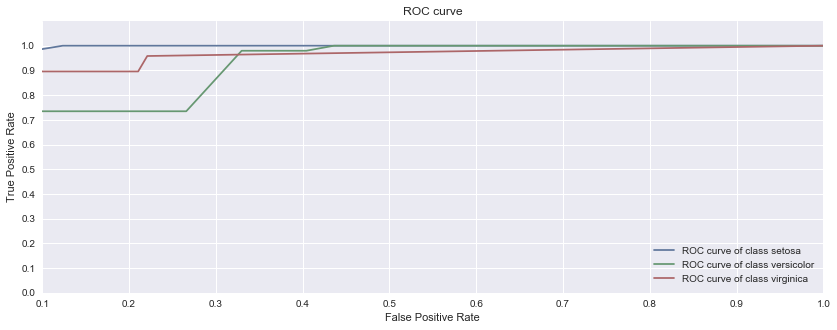

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import seaborn as sns
sns.set_palette("deep", desat=.6)

from sklearn.datasets import load_iris
iris = load_iris()

split = train_test_split(iris.data, iris.target, test_size=0.95)
x_train, x_test, y_train, y_test = split

y_score = RandomForestClassifier().fit(x_train, y_train).predict_proba(x_test)
draw_roc_curve(y_score, y_test, iris.target_names, figsize=(14,5))

# Class vs class feature statistics scatter plot

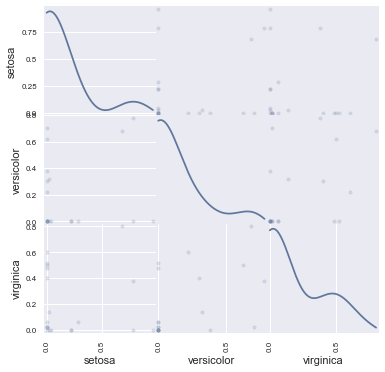

In [19]:
from pandas import DataFrame
%matplotlib inline

import seaborn as sns
sns.set_palette("deep", desat=.6)

from sklearn.datasets import load_iris
iris = load_iris()

stats = feature_statistics_per_class(DataFrame(iris.data), iris.target, iris.target_names)

from pandas.tools.plotting import scatter_matrix
scatter_matrix(stats, alpha=0.2, figsize=(6, 6), diagonal='kde')
None

# Logistic regression feature selection

In [21]:
from sklearn.linear_model import LogisticRegression
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(iris.data, iris.target)

feature_importance_per_class(
    lr.coef_,
    np.array(iris.feature_names),
    iris.target_names)

score
class      feature                    
setosa     petal length (cm) -1.344564
           sepal width (cm)   1.124494
versicolor sepal width (cm)  -0.386390
           petal length (cm)  0.122743
virginica  petal length (cm)  1.277058
           sepal length (cm) -0.987894

In [22]:
total_feature_importance_per_class(
    lr.coef_,
    np.array(iris.feature_names),
    iris.target_names)

,setosa,versicolor,virginica,importance
petal length (cm),-1.344564,0.122743,1.277058,2.744366
sepal width (cm),1.124494,-0.386390,0.000000,1.510884
sepal length (cm),0.000000,0.000000,-0.987894,0.987894
